In [1]:
import tensorflow

In [40]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

In [41]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
train_generator = train_datagen.flow_from_directory(
'Train',
target_size=(150, 150),batch_size=32,class_mode='categorical')

Found 294 images belonging to 3 classes.


In [44]:
test_generator = test_datagen.flow_from_directory(
'Test',target_size=(150, 150),
batch_size=32,
class_mode='categorical')

Found 294 images belonging to 3 classes.


In [45]:
validation_generator = validation_datagen.flow_from_directory(
    'Validation',
     target_size=(150,150),batch_size=32,class_mode="categorical")

Found 294 images belonging to 3 classes.


In [46]:

history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=10,
validation_data=validation_generator,
validation_steps=10)

Epoch 1/10
10/10 [==============================] - 23s 2s/step - loss: 1.0291 - acc: 0.4252 - val_loss: 0.8664 - val_acc: 0.7551
Epoch 2/10
10/10 [==============================] - 20s 2s/step - loss: 0.7042 - acc: 0.7653 - val_loss: 0.6790 - val_acc: 0.7109
Epoch 3/10
10/10 [==============================] - 20s 2s/step - loss: 0.4812 - acc: 0.8367 - val_loss: 0.3989 - val_acc: 0.8571
Epoch 4/10
10/10 [==============================] - 20s 2s/step - loss: 0.2754 - acc: 0.9422 - val_loss: 0.4968 - val_acc: 0.6973
Epoch 5/10
10/10 [==============================] - 22s 2s/step - loss: 0.2008 - acc: 0.9456 - val_loss: 0.1575 - val_acc: 0.9762
Epoch 6/10
10/10 [==============================] - 20s 2s/step - loss: 0.1593 - acc: 0.9728 - val_loss: 0.1115 - val_acc: 0.9762
Epoch 7/10
10/10 [==============================] - 20s 2s/step - loss: 0.0718 - acc: 0.9864 - val_loss: 0.1010 - val_acc: 0.9762
Epoch 8/10
10/10 [==============================] - 20s 2s/step - loss: 0.0399 - acc: 1.00

In [47]:
model.evaluate(test_generator)

10/10 [==============================] - 5s 490ms/step - loss: 0.0937 - acc: 0.9762


[0.0937466248869896, 0.976190447807312]

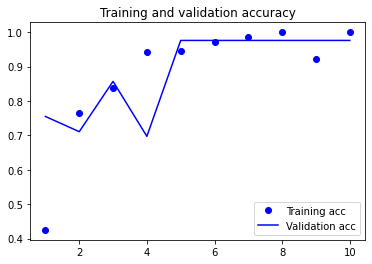

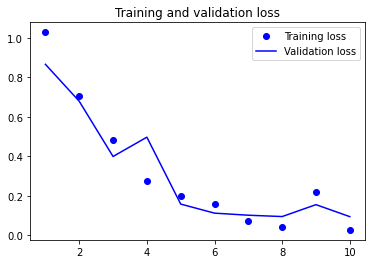

In [48]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
model.save('Real_Face_Recognition.h5')

In [49]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [50]:
img = image.load_img("Test/Akbar/13.jpg", target_size=(150,150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [51]:
prediction

array([[9.9575990e-01, 3.7686876e-03, 4.7142772e-04]], dtype=float32)

In [52]:
img = image.load_img("Test/Saeed/30.jpg", target_size=(150,150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [53]:
prediction

array([[0.00262845, 0.9955226 , 0.00184896]], dtype=float32)

In [54]:
img = image.load_img("Test/Tariq/30.jpg", target_size=(150,150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [55]:
prediction

array([[2.8559202e-04, 5.6125980e-04, 9.9915314e-01]], dtype=float32)